An√°lise e Otimiza√ß√£o do Consumo de Energia Residencial por Ambiente



1. Introdu√ß√£o

Objetivo:

entender o consumo de energia el√©trica em resid√™ncias dividido por c√¥modos e identificar padr√µes para otimizar uso e reduzir desperd√≠cios.

Import√¢ncia:

energia √© um dos maiores custos fixos, e uma gest√£o eficiente traz economia financeira e ambiental.

Dados:

consumo di√°rio por c√¥modo (quartos, sala, cozinha, piscina) e consumo total (KW/H) em 211 dias.

2. Metodologia


An√°lise explorat√≥ria:

estudamos dados de consumo por c√¥modo, identificando m√©dias, varia√ß√µes e perfis t√≠picos.

Clusteriza√ß√£o:

agrupamos resid√™ncias em clusters de consumo (baixo, equilibrado, alto) para personalizar recomenda√ß√µes.

Modelagem preditiva:

constru√≠mos um modelo de regress√£o linear para prever o consumo total a partir do consumo individual de cada c√¥modo.

Avalia√ß√£o:

medimos desempenho do modelo com m√©tricas MAE e R¬≤ para garantir previs√µes confi√°veis.

Recomenda√ß√µes:

baseadas nos clusters, sugerimos a√ß√µes pr√°ticas para cada perfil.

3. Resultados e An√°lise

Clusteriza√ß√£o:

identificamos 3 grupos principais:

Baixo consumo ‚Äî resid√™ncias com consumo controlado e eficiente.

Consumo equilibrado ‚Äî consumo m√©dio com algumas √°reas elevadas.

Alto consumo ‚Äî consumo elevado, especialmente em sala, cozinha ou piscina.

Modelo de regress√£o linear: R¬≤ de 0,86 indica alta capacidade preditiva.

Sala tem maior impacto no consumo total.

An√°lise temporal:

identificamos picos e sazonalidades para futuras interven√ß√µes programadas.

4. Conclus√µes de Ci√™ncia de Dados


Os dados possibilitaram segmentar resid√™ncias e prever consumo com alta precis√£o.

O modelo √© simples, interpret√°vel e indica os c√¥modos que mais influenciam o consumo total.

A an√°lise permitiu criar perfis que facilitam recomenda√ß√µes direcionadas.

5. Impacto de Neg√≥cio e Recomenda√ß√µes


Com base nos clusters, o cliente pode oferecer planos personalizados, descontos e incentivos para reduzir consumo.

Sugest√µes incluem automa√ß√£o, sensores de presen√ßa, uso consciente e tarifas diferenciadas.

A abordagem pode reduzir custos e aumentar satisfa√ß√£o do cliente, al√©m de contribuir para sustentabilidade.

In [16]:
import pandas as pd
import locale
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [17]:
# Carregar o arquivo Excel com m√∫ltiplas abas
file_path = "Consumo_de_Energia_Analise.xlsx"
xls = pd.ExcelFile(file_path)

# Listar os nomes das abas
sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [18]:
# Carregar os dados da aba "Sheet1"
df = xls.parse('Sheet1')

# Exibir as primeiras linhas para an√°lise inicial
df

Data  KW/H  Quarto1  Quarto2  Sala  Cozinha  Piscina
0    01/jan  1395       10        8    15       16        9
1    02/jan  1086        9        8    10        6       10
2    03/jan  1174       10       11     9       13        6
3    04/jan  1207        6        8    10        8       16
4    05/jan  1036       13        4    10        8        8
..      ...   ...      ...      ...   ...      ...      ...
206  26/jul  1355       12       12    12       10        6
207  27/jul  1533       14       12    16       13       10
208  28/jul   967        4        9     8        8        9
209  29/jul  1416       14       10    13        8       10
210  30/jul   789        8        4     6        3       13

[211 rows x 7 columns]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     211 non-null    object
 1   KW/H     211 non-null    int64 
 2   Quarto1  211 non-null    int64 
 3   Quarto2  211 non-null    int64 
 4   Sala     211 non-null    int64 
 5   Cozinha  211 non-null    int64 
 6   Piscina  211 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.7+ KB


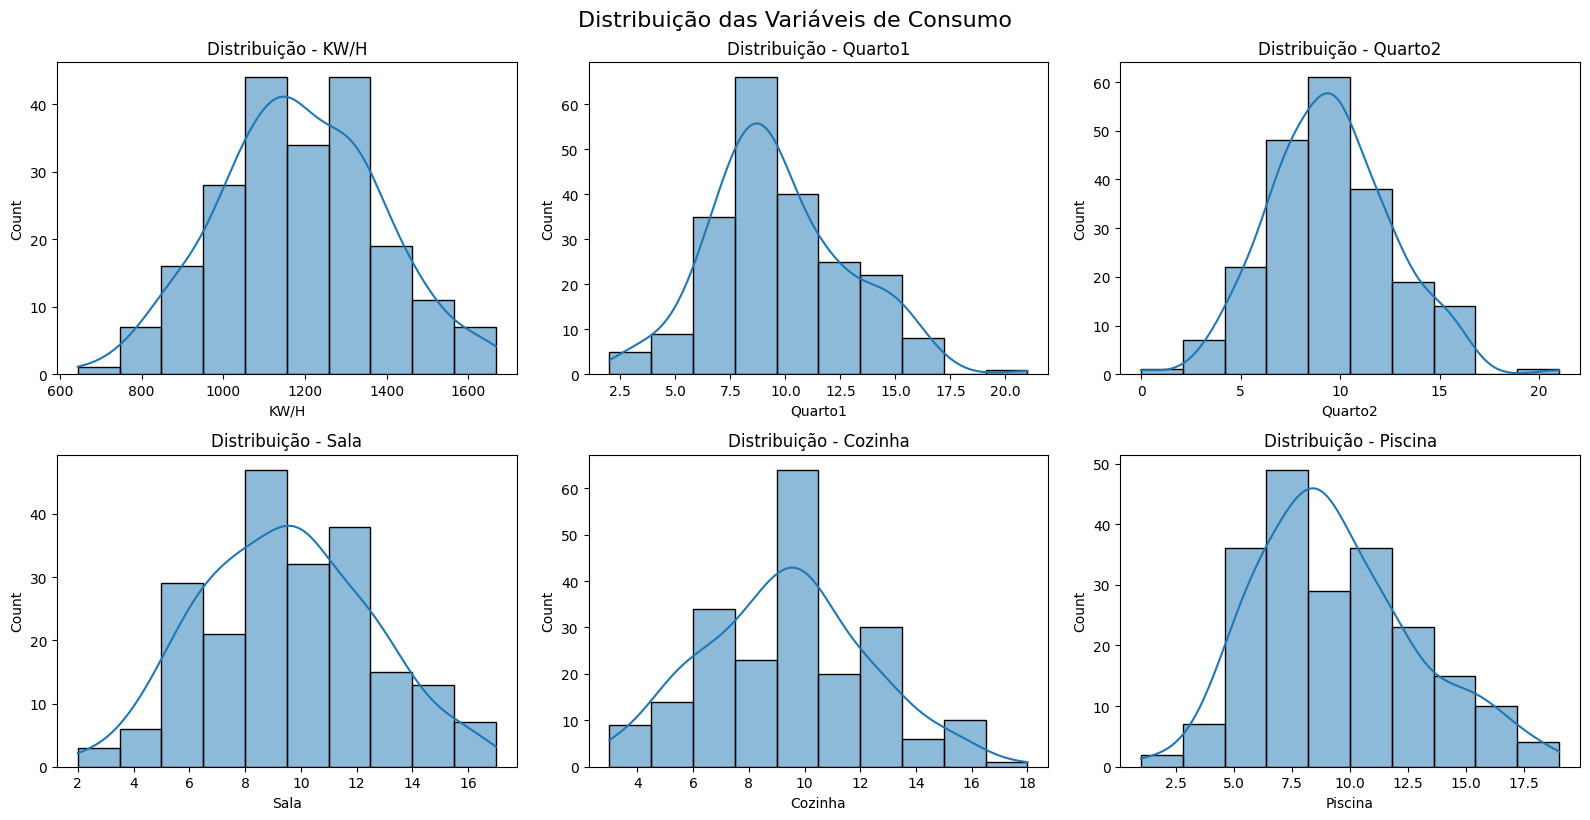

(              KW/H     Quarto1     Quarto2        Sala     Cozinha     Piscina
 count   211.000000  211.000000  211.000000  211.000000  211.000000  211.000000
 mean   1188.317536    9.687204    9.549763    9.445498    9.322275    9.383886
 std     197.439318    3.176817    3.073874    3.033247    2.969757    3.436433
 min     644.000000    2.000000    0.000000    2.000000    3.000000    1.000000
 25%    1057.000000    8.000000    7.000000    7.000000    7.000000    7.000000
 50%    1176.000000    9.000000    9.000000    9.000000    9.000000    9.000000
 75%    1324.000000   12.000000   11.500000   12.000000   11.000000   11.000000
 max    1667.000000   21.000000   21.000000   17.000000   18.000000   19.000000,
              KW/H   Quarto1   Quarto2      Sala   Cozinha   Piscina
 KW/H     1.000000  0.521439  0.418033  0.548475  0.409667  0.427213
 Quarto1  0.521439  1.000000  0.060606  0.169207  0.071809  0.064704
 Quarto2  0.418033  0.060606  1.000000  0.038469  0.049356  0.012383
 Sa

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento de abrevia√ß√µes de meses em portugu√™s para n√∫meros
meses_pt = {
    'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04',
    'mai': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'set': '09', 'out': '10', 'nov': '11', 'dez': '12'
}

# The 'Data' column is already in datetime format from a previous step,
# so we can remove the date conversion lines.
# df['Data'] = df['Data'].astype(str)
# df['Data'] = df['Data'].str.lower().replace(meses_pt, regex=True)
# df['Data'] = pd.to_datetime(df['Data'] + '/2025', format='%d/%m/%Y')

# Estat√≠sticas descritivas
summary = df.describe()

# Correla√ß√£o entre as vari√°veis
correlation = df.corr(numeric_only=True)

# Visualiza√ß√£o: histograma das vari√°veis
cols_to_plot = df.columns[1:]  # Ignora a coluna 'Data'
n_cols = len(cols_to_plot)
n_rows = (n_cols + 2) // 3  # 3 colunas por linha

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=10)
    axes[i].set_title(f'Distribui√ß√£o - {col}')
    axes[i].set_xlabel(col)

# Remove axes n√£o usados, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribui√ß√£o das Vari√°veis de Consumo", fontsize=16, y=1.02)
plt.show()

summary, correlation

üìà Resumo Estat√≠stico das Vari√°veis
M√©dia de consumo di√°rio: 1188,3 kWh

M√°ximo: 1667 kWh, M√≠nimo: 644 kWh

C√¥modos mais acionados:

Quarto1: m√©dia de 9,7 vezes/dia

Cozinha e Piscina: ~9,3 vezes/dia

Sala tem a maior varia√ß√£o de uso (at√© 17 vezes/dia)

Os dados est√£o bem distribu√≠dos ‚Äî sem grandes distor√ß√µes ou outliers evidentes.

üìä Correla√ß√£o com o consumo total (KW/H):
Sala tem a maior correla√ß√£o com o consumo total: 0.55

Depois v√™m Quarto1 (0.52) e Piscina (0.43)

Quarto2 e Cozinha tamb√©m influenciam, mas com menor peso.

A Cozinha tem correla√ß√£o negativa com a Piscina (-0.08), sugerindo uso alternado em alguns dias.

üß† Insights de Ci√™ncia de Dados + Neg√≥cio
Voc√™ pode construir um modelo de regress√£o linear para prever o consumo com base nas ativa√ß√µes por c√¥modo.

Uma clusteriza√ß√£o K-means tamb√©m pode separar dias em grupos de uso leve, moderado e intenso ‚Äî √≥timo para personalizar alertas ou otimizar tarifas.

Do ponto de vista ESG e Smart City, esses dados podem orientar:

Campanhas educativas por c√¥modo (ex: ‚ÄúUso consciente da sala‚Äù)

Automa√ß√£o via IoT (ex: alertas quando uso da piscina exceder padr√£o)

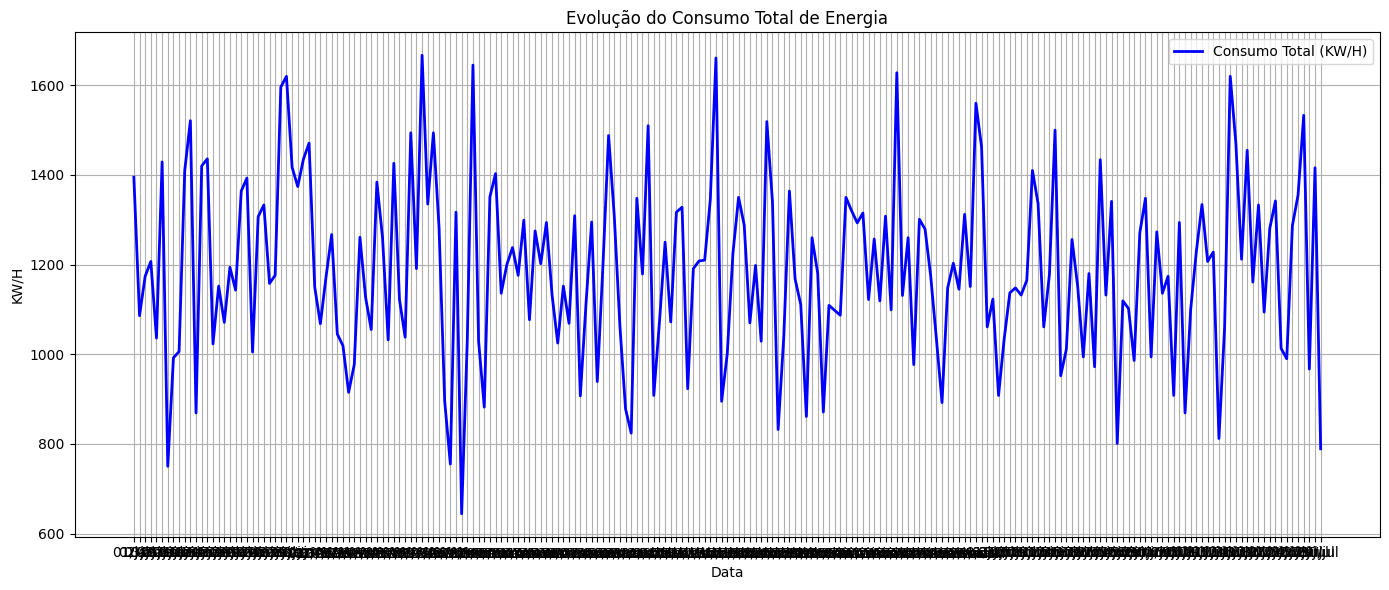

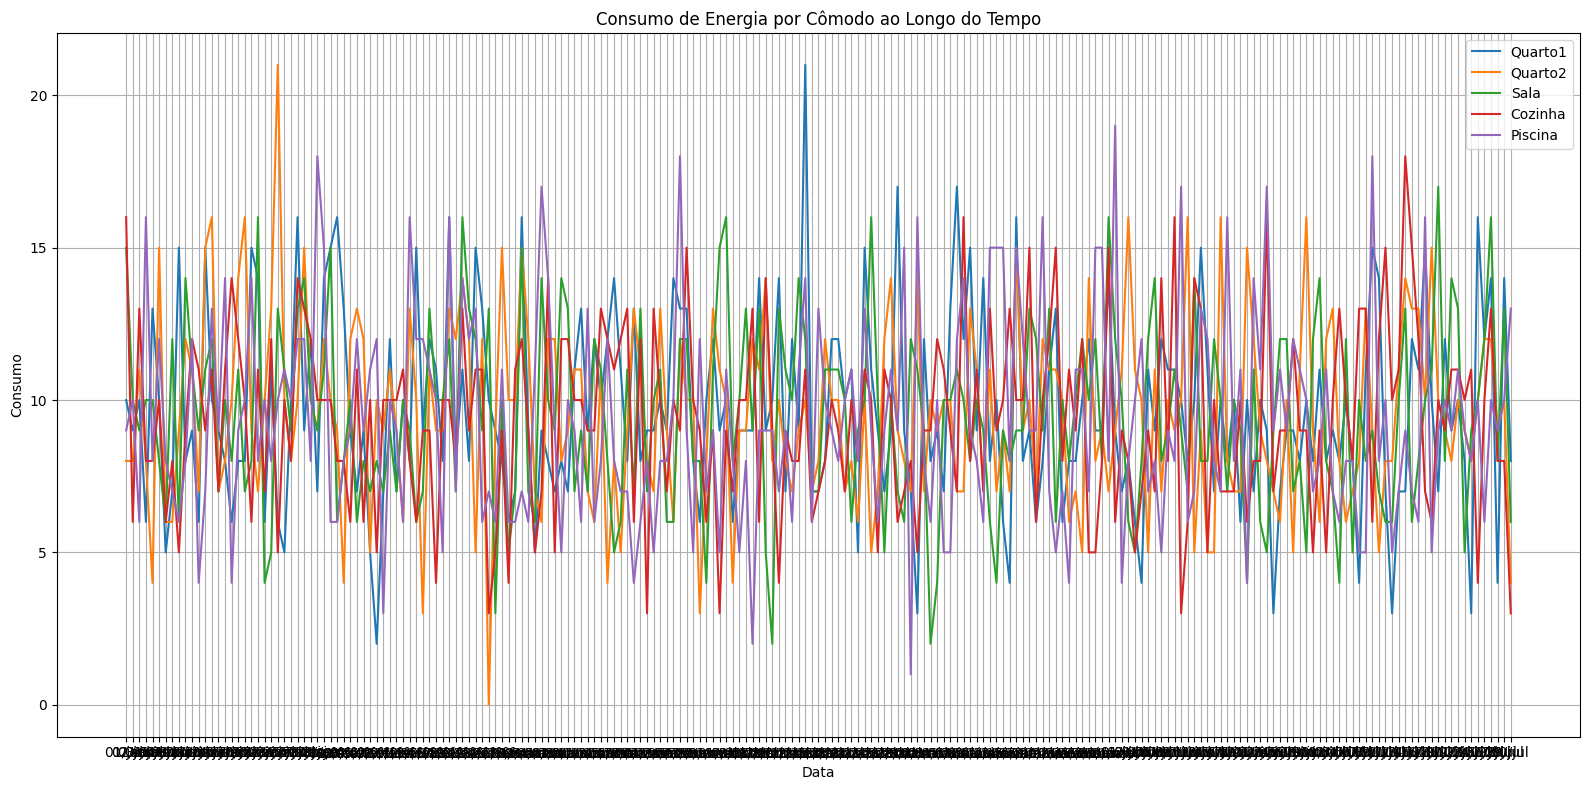

In [21]:
# Plotar consumo total ao longo do tempo
plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['KW/H'], label='Consumo Total (KW/H)', color='blue', linewidth=2)
plt.title('Evolu√ß√£o do Consumo Total de Energia')
plt.xlabel('Data')
plt.ylabel('KW/H')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Agora plotar o consumo por c√¥modo no mesmo gr√°fico, para comparar
plt.figure(figsize=(16, 8))
for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
    plt.plot(df['Data'], df[comodo], label=comodo)

plt.title('Consumo de Energia por C√¥modo ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Definir vari√°veis preditoras (X) e vari√°vel alvo (y)
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']]
y = df['KW/H']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regress√£o linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predi√ß√£o
y_pred = modelo.predict(X_test)

# Avalia√ß√£o do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Erro m√©dio absoluto (MAE):", mean_absolute_error(y_test, y_pred))
print("R¬≤ (coeficiente de determina√ß√£o):", r2_score(y_test, y_pred))

Coeficientes: [23.36409077 23.15884869 25.79029969 23.48572963 24.44823671]
Intercepto: 49.886394002345696
Erro m√©dio absoluto (MAE): 57.743376101762394
R¬≤ (coeficiente de determina√ß√£o): 0.8638797274963957


üìå Resultados do Modelo

‚úÖ Coeficientes:

Sala: +25.79 ‚Üí maior impacto no consumo total

Piscina: +24.45

Cozinha: +23.49

Quarto1 / Quarto2: tamb√©m relevantes, cerca de +23.3 e +23.1

Isso indica que cada vez que um ambiente √© utilizado, o consumo estimado aumenta cerca de 23 a 26 kWh, com a sala sendo a mais impactante.

üéØ Intercepto:

49.88 kWh: o consumo base estimado mesmo com zero ativa√ß√µes ‚Äî pode refletir consumo cont√≠nuo (geladeiras, standby etc.)

üìâ Erro M√©dio Absoluto (MAE):

57.74 kWh ‚Üí baixo em rela√ß√£o √† m√©dia total (~1188 kWh), indicando boa precis√£o.

üìà R¬≤ (Coeficiente de determina√ß√£o):

0.86 ‚Üí o modelo explica 86% da varia√ß√£o no consumo, um valor muito bom para aplica√ß√µes pr√°ticas.



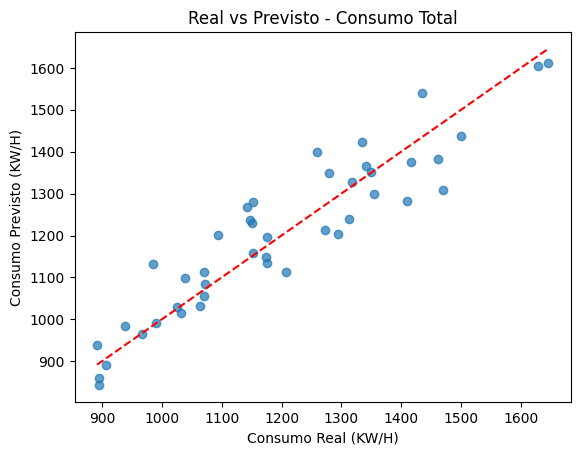

In [23]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linha identidade
plt.xlabel('Consumo Real (KW/H)')
plt.ylabel('Consumo Previsto (KW/H)')
plt.title('Real vs Previsto - Consumo Total')
plt.show()

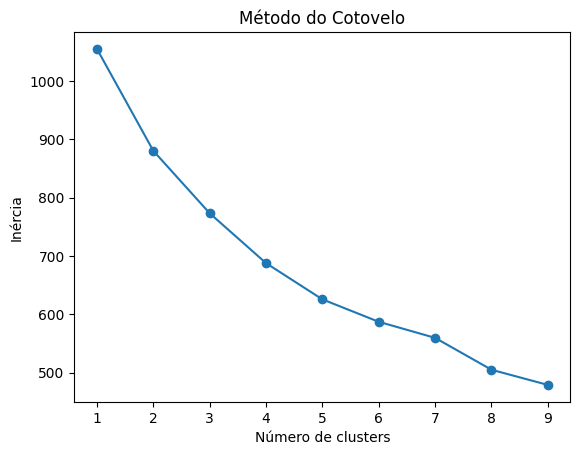

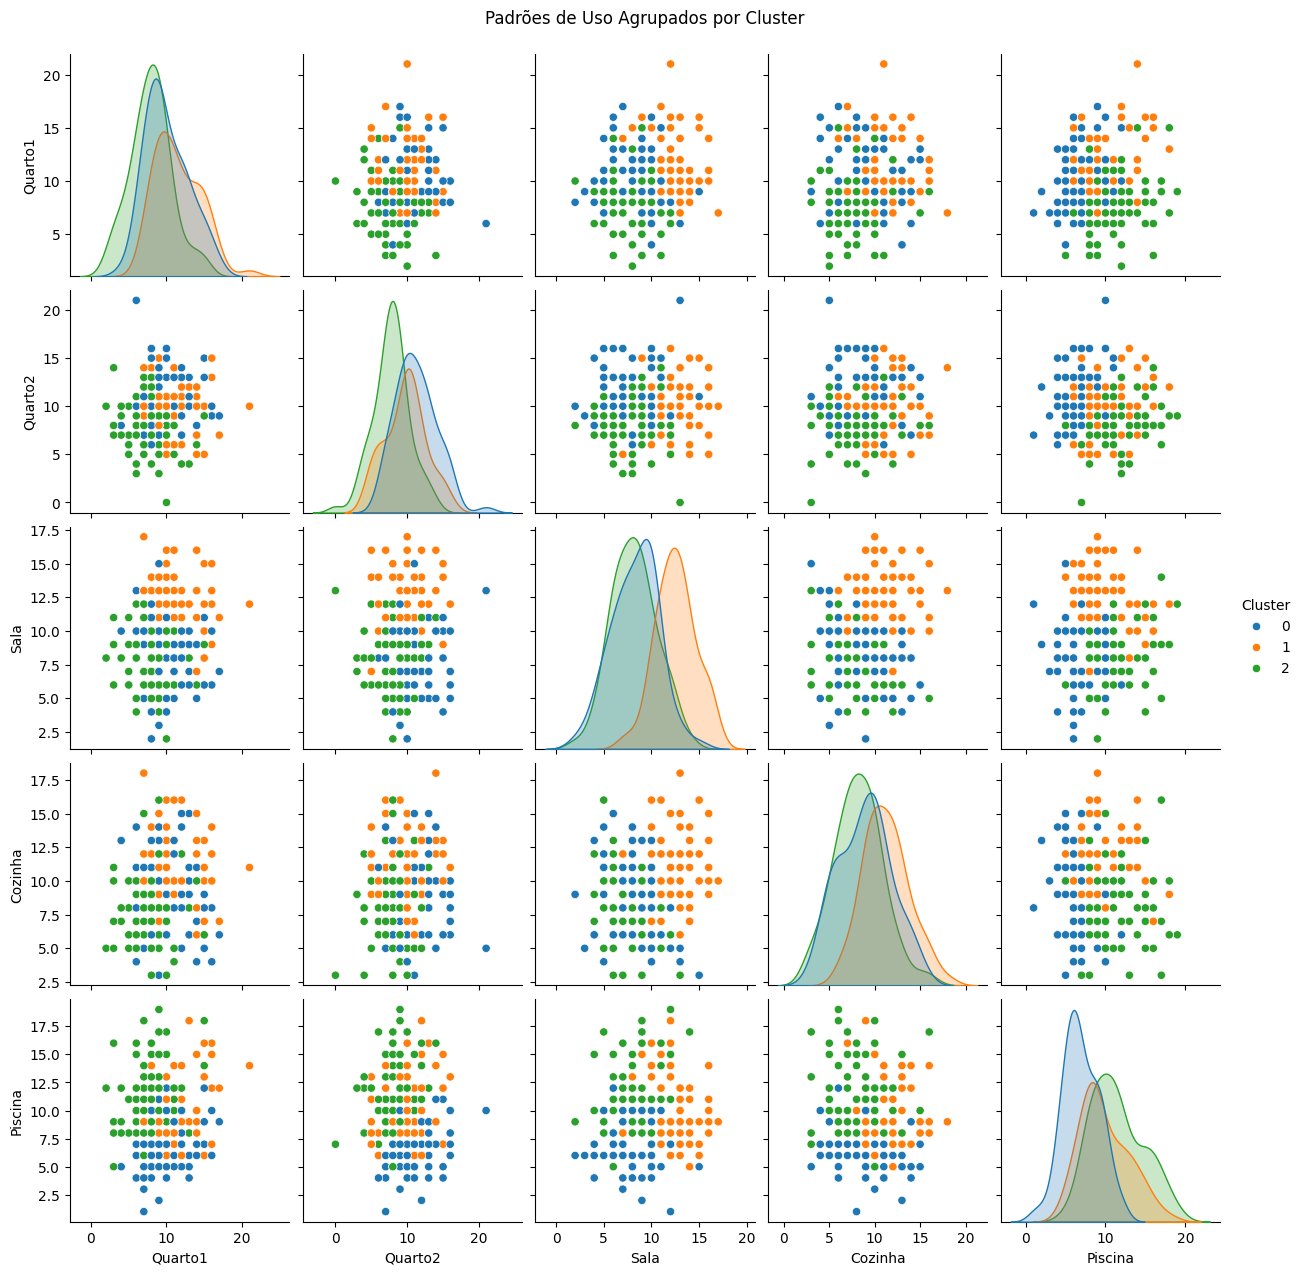

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Dados usados na clusteriza√ß√£o
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']]

# Normaliza√ß√£o (fundamental para KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar n√∫mero ideal de clusters (opcional)
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('M√©todo do Cotovelo')
plt.xlabel('N√∫mero de clusters')
plt.ylabel('In√©rcia')
plt.show()

# Aplicar KMeans com 3 clusters (ajuste conforme o gr√°fico do cotovelo)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualiza√ß√£o
sns.pairplot(df, hue='Cluster', vars=['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina'], palette='tab10')
plt.suptitle("Padr√µes de Uso Agrupados por Cluster", y=1.02)
plt.show()

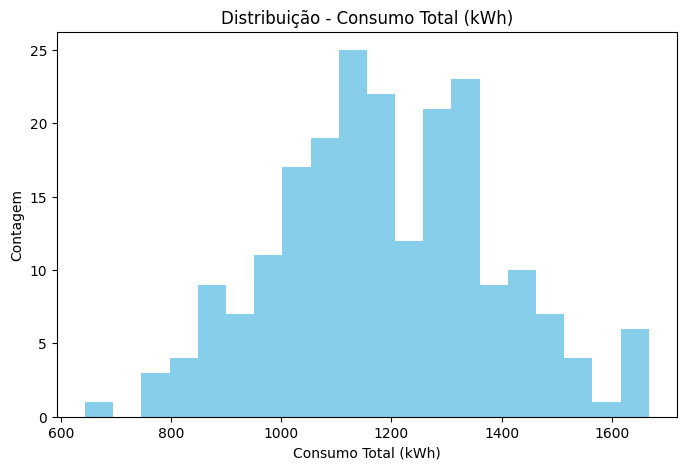

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(df['KW/H'], bins=20, color='skyblue')
plt.title('Distribui√ß√£o - Consumo Total (kWh)')
plt.xlabel('Consumo Total (kWh)')
plt.ylabel('Contagem')
plt.show()


In [26]:
# === PERFIL DE CADA CLUSTER ===
perfil_clusters = df.groupby('Cluster')[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina', 'KW/H']].mean()

def nomear_cluster(row):
    media_kw = df['KW/H'].mean()

    # Consumo total
    if row['KW/H'] < media_kw * 0.75:
        consumo_total = 'üîµ Baixo Consumo'
    elif row['KW/H'] > media_kw * 1.25:
        consumo_total = 'üî¥ Alto Consumo'
    else:
        consumo_total = 'üü° Consumo Equilibrado'

    # Verificar c√¥modos com consumo alto
    altos = []
    for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
        if row[comodo] > df[comodo].mean() * 1.2:  # 20% acima da m√©dia daquele c√¥modo
            altos.append(comodo)

    # Montar nome do cluster com base nos c√¥modos de alto consumo
    if consumo_total == 'üîµ Baixo Consumo':
        return consumo_total

    if consumo_total == 'üü° Consumo Equilibrado' and len(altos) == 0:
        return consumo_total

    if consumo_total == 'üü° Consumo Equilibrado' and len(altos) > 0:
        return f"üü† Consumo Elevado em {', '.join(altos)}"

    if consumo_total == 'üî¥ Alto Consumo':
        if len(altos) == 0:
            return consumo_total
        else:
            return f"üî¥ Alto Consumo (Em {', '.join(altos)})"

perfil_clusters['Perfil'] = perfil_clusters.apply(nomear_cluster, axis=1)

# Mapeamento para chaves base do dicion√°rio recomendacoes
def mapear_perfil_para_chave(perfil):
    if perfil == 'üîµ Baixo Consumo':
        return perfil
    if perfil == 'üü° Consumo Equilibrado':
        return perfil
    if perfil.startswith('üü† Consumo Elevado'):
        # Aqui voc√™ pode escolher um nome gen√©rico ou identificar c√¥modo espec√≠fico
        # Por exemplo, se s√≥ quiser geral:
        return 'üü† Consumo Elevado'
    if perfil.startswith('üî¥ Alto Consumo'):
        # Pode mapear por c√¥modos mais frequentes ou usar geral
        # Vamos tentar diferenciar por c√¥modo principal (primeiro da lista)
        # Exemplo de extra√ß√£o do primeiro c√¥modo:
        import re
        encontrados = re.findall(r'\b\w+\b', perfil)  # pega palavras
        # Pegando o primeiro c√¥modo ap√≥s "Em"
        if 'Em' in perfil:
            idx = perfil.index('Em') + 3
            # extrair o texto depois de "Em "
            texto = perfil[idx:]
            principal = texto.split(',')[0].strip()
            if principal == 'Sala' or principal == 'Piscina':
                return 'üî¥ Alto Consumo (Sala/Piscina)'
            elif principal == 'Cozinha':
                return 'üî¥ Alto Consumo (Cozinha)'
            else:
                return 'üî¥ Alto Consumo'
        else:
            return 'üî¥ Alto Consumo'
    return perfil  # fallback

recomendacoes = {
    'üîµ Baixo Consumo': [
        "‚úÖ Manter boas pr√°ticas j√° adotadas.",
        "üéÅ Oferecer recompensas ou descontos (gamifica√ß√£o).",
        "üîã Incentivar uso de energia solar / microgera√ß√£o."
    ],
    'üü° Consumo Equilibrado': [
        "üîå Automatizar desligamento de equipamentos em hor√°rios fixos.",
        "üïµÔ∏è Instalar sensores de presen√ßa em quartos e sala.",
        "üìä Enviar relat√≥rios semanais de uso comparativo."
    ],
    'üü† Consumo Elevado': [
        "üõèÔ∏è Automatizar luzes e eletr√¥nicos nos c√¥modos com consumo elevado.",
        "üïµÔ∏è Instalar sensores de presen√ßa espec√≠ficos para os c√¥modos.",
        "üìä Acompanhar o uso para identificar picos desnecess√°rios."
    ],
    'üî¥ Alto Consumo (Sala/Piscina)': [
        "üíß Agendar funcionamento da bomba da piscina fora do pico.",
        "üí° Incentivar uso consciente da ilumina√ß√£o e eletr√¥nicos.",
        "üß† Sugerir automa√ß√£o e ades√£o √† tarifa branca."
    ],
    'üî¥ Alto Consumo (Cozinha)': [
        "üç≥ Verificar equipamentos de cozinha para consumo excessivo.",
        "‚è∞ Controlar hor√°rios de uso de forno e geladeira.",
        "üí° Incentivar uso eficiente da ilumina√ß√£o."
    ]
}

# Exibir os perfis e recomenda√ß√µes
for cluster_id, row in perfil_clusters.iterrows():
    print(f"\n=== Cluster {cluster_id} - {row['Perfil']} ===")
    print("üìä Perfil m√©dio:")
    print(row[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina', 'KW/H']])
    print("\nüí° Recomenda√ß√µes:")

    chave = mapear_perfil_para_chave(row['Perfil'])

    if chave in recomendacoes:
        for item in recomendacoes[chave]:
            print("-", item)
    else:
        print("- Sem recomenda√ß√µes espec√≠ficas para este perfil.")



=== Cluster 0 - üü° Consumo Equilibrado ===
üìä Perfil m√©dio:
Quarto1           10.0
Quarto2      11.186667
Sala          8.253333
Cozinha       8.893333
Piscina       6.933333
KW/H       1129.986667
Name: 0, dtype: object

üí° Recomenda√ß√µes:
- üîå Automatizar desligamento de equipamentos em hor√°rios fixos.
- üïµÔ∏è Instalar sensores de presen√ßa em quartos e sala.
- üìä Enviar relat√≥rios semanais de uso comparativo.

=== Cluster 1 - üü† Consumo Elevado em Sala, Cozinha ===
üìä Perfil m√©dio:
Quarto1      11.459016
Quarto2       9.737705
Sala         12.508197
Cozinha      11.229508
Piscina       9.885246
KW/H       1368.131148
Name: 1, dtype: object

üí° Recomenda√ß√µes:
- üõèÔ∏è Automatizar luzes e eletr√¥nicos nos c√¥modos com consumo elevado.
- üïµÔ∏è Instalar sensores de presen√ßa espec√≠ficos para os c√¥modos.
- üìä Acompanhar o uso para identificar picos desnecess√°rios.

=== Cluster 2 - üü† Consumo Elevado em Piscina ===
üìä Perfil m√©dio:
Quarto1     7.9333

# Relat√≥rio de Perfis de Consumo por Cluster

---

## === Cluster 0 - üü° Consumo Equilibrado ===

### üìä Perfil m√©dio:
| Ambiente  | Consumo M√©dio (kWh) |
| --------- | ------------------- |
| Quarto1   | 10.00               |
| Quarto2   | 11.19               |
| Sala      | 8.25                |
| Cozinha   | 8.89                |
| Piscina   | 6.93                |
| **Total (KW/H)** | **1129.99**      |

### üí° Recomenda√ß√µes:
- üîå Automatizar desligamento de equipamentos em hor√°rios fixos.
- üïµÔ∏è Instalar sensores de presen√ßa em quartos e sala.
- üìä Enviar relat√≥rios semanais de uso comparativo.

---

## === Cluster 1 - üü† Consumo Elevado em Sala, Cozinha ===

### üìä Perfil m√©dio:
| Ambiente  | Consumo M√©dio (kWh) |
| --------- | ------------------- |
| Quarto1   | 11.46               |
| Quarto2   | 9.74                |
| Sala      | 12.51               |
| Cozinha   | 11.23               |
| Piscina   | 9.89                |
| **Total (KW/H)** | **1368.13**      |

### üí° Recomenda√ß√µes:
- üõèÔ∏è Automatizar luzes e eletr√¥nicos nos c√¥modos com consumo elevado.
- üïµÔ∏è Instalar sensores de presen√ßa espec√≠ficos para os c√¥modos.
- üìä Acompanhar o uso para identificar picos desnecess√°rios.

---

## === Cluster 2 - üü† Consumo Elevado em Piscina ===

### üìä Perfil m√©dio:
| Ambiente  | Consumo M√©dio (kWh) |
| --------- | ------------------- |
| Quarto1   | 7.93                |
| Quarto2   | 7.76                |
| Sala      | 8.15                |
| Cozinha   | 8.20                |
| Piscina   | 11.43               |
| **Total (KW/H)** | **1100.40**      |

### üí° Recomenda√ß√µes:
- üíß Monitorar o uso da piscina e bombas.
- ‚è∞ Programar hor√°rios eficientes para funcionamento.
- üí° Incentivar uso consciente da ilumina√ß√£o externa.

---

*Fim do relat√≥rio.*
